# Вариант 10

Обработайте статистические данные 100 независимых измерений некоторой физической величины Х.

1) Составьте статистическое распределение частот выборки Х.

2) Найдите эмпирическую функцию распределения и постройте ее график.

3) Постройте полигон и гистограмму относительных частот.

4) Вычислите числовые характеристики:
- выборочную среднюю;
- выборочную дисперсию;
- выборочное среднее квадратическое отклонение;
- коэффициенты эксцесса и ассиметрии.

5) Выдвинув гипотезу о нормальном распределении, проверьте ее критерием согласия Пирсона при уровне значимости а = 0.05.

6) Найдите точечные и интервальные оценки параметров распределения (доверительную вероятность принять равной 0.95).

7) Сделать регрессионный анализ.

8) Сделать дисперсионный анализ.

In [1]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats.contingency import expected_freq
from scipy import stats
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from statsmodels.formula.api import ols
%matplotlib inline

### Загрузка данных из файла

In [2]:
data=pd.read_csv('data.txt')
data.head()

,x,y
0,172,63
1,164,60
2,164,53
3,161,60
4,172,66


### Гистограмма величин X

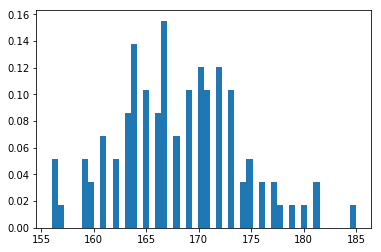

In [3]:
plt.hist(data['x'],50, normed='True')
plt.show()

## 1) Составьте статистическое распределение частот выборки Х

Чтобы построить статистическое распределение частот выборки, необходимо определить максимальное и минимальное значение величины, разницу между минимумом и максимумом. Число интервалов найдем с помощью формулы Страджесса:
$$k=3,31*lgn+1$$
Шаг найдем по следующей формуле:
$$h=\frac{R}{k}$$

In [4]:
X_max = max(data['x'])
X_min = min(data['x'])
R = X_max -X_min
K = int(round(1.0 + 3.32 * np.log10(100)))
H = int(R / K)

print("Max X:", X_max)
print("Min X:", X_min)
print("Разница max и min:", R)         
print("Кол-во отрезков:", K)
print("Шаг:", H)             

Max X: 185
Min X: 156
Разница max и min: 29
Кол-во отрезков: 8
Шаг: 3


Теперь, зная все нужные параметры, можно рассчитать частоты по интервалам.

In [5]:
def intervals_cumsum(x_min, step, size):
    start=x_min
    a=[]
    b=[]
    for i in range(size):
        a.append(start)
        start+=step
        b.append(start)
    return a,b

def count_values(data,element):
    count=0
    counts=[]
    for item in data['x']:
        if item<=element:
            count+=1
    return count
   
def counter_in(data, b):
    delta=[];f=0
    for index in range(len(b)):
        first=count_values(data,b[index])-f
        delta.append(first)
        f+=first
    return delta
     
def frequences(ni, n):
    freq=[]
    for item in ni:
        freq.append(item/n)
    return freq
        
a, b = intervals_cumsum(X_min, H, K)
ni = counter_in(data, b)
freq = frequences(ni, 100)
print('Частоты по интервалам:', freq)
print('Сумма частот:', round(sum(freq)))

Частоты по интервалам: [0.07, 0.09, 0.19, 0.18, 0.19, 0.15, 0.07, 0.03]
Сумма частот: 1


## 2) Найдите эмпирическую функцию распределения и постройте ее график.

С помощью модуля distributions библиотеки statsmodels построим график функции распределения.

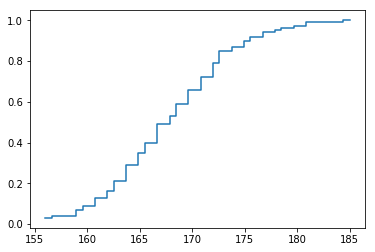

In [6]:
graph = sm.distributions.ECDF(data['x'])
x = np.linspace(min(data['x']), max(data['x']))
y = graph(x)
plt.step(x, y)
plt.show()

## 3) Постройте полигон и гистограмму относительных частот.

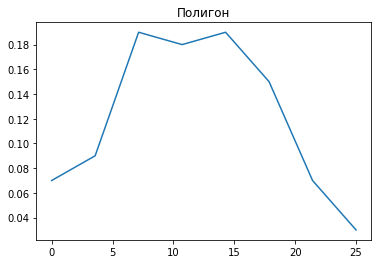

In [7]:
x=np.linspace(0,25,8)
plt.plot(x, freq)
plt.title(u'Полигон')
plt.show()

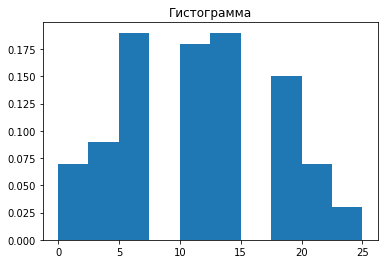

In [8]:
plt.hist(x, 10, weights=freq)
plt.title(u'Гистограмма')
plt.show()

## 4) Вычислите числовые характеристики.

***Мода***     
Модой распределения называется такая величина изучаемого признака, которая в данной совокупности встречается наиболее часто, т.е. один из вариантов признака повторяется чаще, чем все другие.

Мода выборки вычисляется с помощью модуля stats библиотеки scipy.

In [9]:
print("Мода выборки:", stats.mode(data['x']).mode[0])

Мода выборки: 167


***Медиана***    
Медиана - это значение признака, приходящееся на середину ряда, расположенного в порядке возрастания или убывания числовых значений признака.

Медиана вычисляется с помощью функции median() библиотеки numpy.

In [10]:
print("Медиана:", np.median(data['x']))

Медиана: 168.0


***Среднее значение***    
Среднее значение вычисляется с помощью функции mean() библиотеки numpy.

In [11]:
print("Среднее значение:", np.mean(data['x']))

Среднее значение: 168.09


***Дисперсия***     
Дисперсия дает характеристику разброса данных вокруг центра (математического ожидания). То есть дисперсия - это математическое ожидание отклонений от математического ожидания.

Дисперсия вычисляется с помощью функции var() библиотеки numpy.

In [12]:
print("Дисперсия:", np.var(data['x']))

Дисперсия: 34.14190000000001


***Среднее квадратичное отклонение***     
Среднеквадратичное отклонение характеризует меру рассеяния данных, но имеет те же единицы измерения что у исходных данных.

Среднее квадратичное отклонение вычисляется с помощью функции std() библиотеки numpy.

In [13]:
print("Среднее квадратичное отклонение:", np.std(data['x']))

Среднее квадратичное отклонение: 5.843107050191705


***Коэффициент вариации***     
Среднее квадратическое отклонение дает абсолютную оценку меры разброса. Поэтому чтобы понять, насколько разброс велик относительно самих значений, требуется относительный показатель. Такой показатель называется коэффициентом вариации.

Коэффициент вариации вычисляется с помощью модуля stats библиотеки scipy. 

In [14]:
print("Коэффициент вариации:", stats.variation(data['x']))

Коэффициент вариации: 0.03476177672789401


***Коэффициенты эксцесса и асимметрии***    
Коэффициент эксцесса $\\gamma_1$ — мера остроты пика по сравнению с нормальным распределением: $\\gamma_1=0$ в случае так называемого нормального эксцесса (в силу того, что у нормального распределения тоже $\\gamma_1=0$), $\\gamma_1<0$ в случае дефекта (т.н. отрицательный эксцесс, когда в окрестности моды более низкая и плоская вершина, чем у нормального распределения), $\\gamma_1>0$ в случае эксцесса (т.н. положительный эксцесс, когда в окрестности моды более острый и высокий пик, чем у нормального распределения).

Коэффициент асимметрии $\\gamma_2$ — мера асимметричности: $\\gamma_2=0$ в случае симметричности распределения относительно мат.ожидания, $\\gamma_2<0$ в случае левой асимметрии (отн. мат.ожидания левый хвост длиннее правого),  $\\gamma_2>0$ в случае правой асимметрии (отн. мат.ожидания правый хвост длиннее левого).

Коэффициенты эксцесса и асимметрии вычисляются с помощью функций модуля stats библиотеки scipy.

In [15]:
print("Коэффициент эксцесса:", stats.kurtosis(data['x']))
print("Коэффициент асимметрии:", stats.skew(data['x']))

Коэффициент эксцесса: -0.03710461649689645
Коэффициент асимметрии: 0.23635184241070914


## 5) Выдвинув гипотезу о нормальном распределении, проверьте ее критерием согласия Пирсона при уровне значимости а = 0.05.    
Коэффициент корреляции Пирсона (лиейный коэффициент корреляции) описывает силу линейной зависимости между двумя случайными величинами. Он принимает значения в отрезке от 1 до -1. Значение к.к. Пирсона близкое к нулю говорит об отсутствии (слабой зависимости) линейной зависимости между случайными величинами. Значение близкое по модулю к еденице, наоборот говорит о сильной линейной зависимости. Стоит отметить, что случайные величины могут быть связаны ещё и нелинейной зависимостью, тогда к.к. Пирсона здесь плохой помошник. Кроме того, вычисляя к.к. по выборке можно совершенно случайно получить то или иное значение к.к., поэтому имеет смысл оперировать ещё и степенью уверенности для этого значения. В математической статистике для этого служит p-value - вероятность получить такое или ещё более выраженное значение случайно. На практике, особенно при небольших объемах выборки нулевого p-value добится не получается, поэтому довольствуются некоторыми малыми вероятностями того, что величниа (в нашем случае к.к) получена не случайно. Обычно, в соответствии с принципом практической невозможности маловероятных событий, принимают допустимую вероятность ошибки в 0.05 или 0.01. 

In [16]:
_a = 0.05
r,p = stats.pearsonr(data['x'], data['y'])
print(r, p < _a)

0.7269800031688217 True


## 6) Найдите точечные и интервальные оценки параметров распределения (доверительную вероятность принять равной 0.95).

Оценки неизвестных параметров бывают двух видов – точечные и интервальные.   
Точечная оценка - оценка имеющая конкретное числовое значение. Например, среднее арифметическое: $$\frac{(x1+x2+...+xn)}{n}$$ где: x1,x2,...xn - выборочные значения; n - объем выборки.
Интервальная оценка - оценка представляемая интервалом значений, внутри которого с задаваемой исследователем вероятностью 1 - α находится истинное значение оцениваемого параметра. Интервал в интервальной оценке называется доверительным интервалом, задаваемая исследователем вероятность, 1 - α, называется доверительной вероятностью. В практике статистических вычислений применяются стандартные значения доверительной вероятности: 0,95, 0,98 и 0,99 (95%, 98% и 99% соответственно).

In [17]:
T_coef=1.98

# Получаем средние значения интервалов
def get_mean_intervals(a, b):
    means=[]
    for i in range(len(a)):
        means.append((a[i]+b[i])/2)
    return means

# Умножаем полученные значения на значения частов этих интервалов
def mean_mult_freq(means, freq):
    m = []
    for i in range(len(means)):
        m.append(means[i]*freq[i])
    return m

# Вычисляем сумму значений, полученных на предыдущем шаге, затем из каждого элемента вычитаем эту сумму
def get_d(means):
    data = []
    for item in means:
        data.append(round(item-sum(mean_mult_freq(means, freq)), 2))
    return data

# Умножаем квадрат полученных значений на соответствующие им частоты
def get_d2(d,freq):
    data = []
    for i in range(len(d)):
        data.append(round(d[i]**2*freq[i], 2))
    return data

means = get_mean_intervals(a, b) 

d = get_d(means)
d = get_d2(d,freq)

# Несмещенное значение
S = np.sqrt(sum(d)*100/99)
# Значение для разброса интервальной оценки
znach = T_coef*S/np.sqrt(len(data['x']))
# Нижняя и верхняя граница интервала
xmax=round(np.mean(data['x'])+znach, 2)
xmin=round(np.mean(data['x'])-znach, 2)

print("Интервальная оценка:")
print(str(xmin)+' < a < '+str(xmax))

Интервальная оценка:
166.66 < a < 169.52


## 7) Сделать регрессионный анализ
Для работы с регрессионным анализом воспользуемся модулем LinearRegression библиотеки sklearn.

In [18]:
lr=LinearRegression().fit(data[['x']], data[['y']])

***Коэффициент линейной регрессии***   
Коэффициенты линейной регрессии показывают скорость изменения зависимой переменной по данному фактору, при фиксированных остальных факторах (в линейной модели эта скорость постоянна).

In [19]:
print("Коэффициент линейной регрессии:", lr.coef_[0][0])

Коэффициент линейной регрессии: 0.8300709685166905


***R-квадрат***    
Коэффициент детерминации принимает значения от 0 до 1. Чем ближе значение коэффициента к 1, тем сильнее зависимость. При оценке регрессионных моделей это интерпретируется как соответствие модели данным. Для приемлемых моделей предполагается, что коэффициент детерминации должен быть хотя бы не меньше 50% (в этом случае коэффициент множественной корреляции превышает по модулю 70%). Модели с коэффициентом детерминации выше 80% можно признать достаточно хорошими.

In [20]:
print("R-квадрат:", lr.score(data[['x']], data[['y']]))

R-квадрат: 0.5284999250073401


***Множественный R***    
Множественный коэффициент корреляции R (множественное R) - это положительный квадратный корень из R-квадрата. Величина коэффициента корреляции отражает силы связи.

In [21]:
print("Множественный R:", data.corr()['y'][0])

Множественный R: 0.7269800031688215


***Уравнение регрессии***    
Используя среднее значение выборки по X и Y, и коэффициент линейной регресии, составим уравнение регрессии:

In [22]:
k = round(lr.coef_[0][0], 2)
mx = round(np.mean(data['x']), 2)
my = round(np.mean(data['y']), 2)
print('y='+str(k)+'*'+'(x-'+str(mx)+')'+'+'+str(my))

y=0.83*(x-168.09)+63.22


Построим график составленной прямой. 

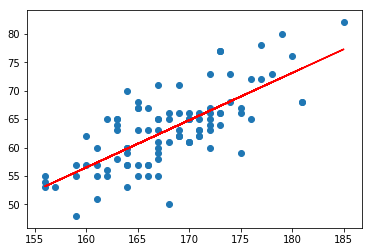

In [23]:
plt.plot(data[['x']], lr.predict(data[['x']]), color='red')
plt.scatter(data['x'], data['y'])
plt.show()

## 8) Дисперсионный анализ
Метод наименьших квадратов (англ. Ordinary Least Squares, OLS) — математический метод, применяемый для решения различных задач, основанный на минимизации суммы квадратов отклонений некоторых функций от искомых переменных.   
Выполним метод наименьших квадратов, установив, что Х зависит от Y (Y~X). Заполняем таблицу.

In [24]:
cw_lm=ols('y~x',data).fit()
sm.stats.anova_lm(cw_lm)

,df,sum_sq,mean_sq,F,PR(>F)
x,1.0,2352.437726,2352.437726,109.847263,1.097766e-17
Residual,98.0,2098.722274,21.415533,NaN,NaN


Функция summary() позволяет узнать множество показателей дисперсионного анализа. Среди них есть стандартная ошибка, t-статистика, сумма квадратов, средний квадрат и другие.

In [25]:
cw_lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.528
Model:                            OLS   Adj. R-squared:                  0.524
Method:                 Least Squares   F-statistic:                     109.8
Date:                Thu, 17 May 2018   Prob (F-statistic):           1.10e-17
Time:                        00:46:48   Log-Likelihood:                -294.09
No. Observations:                 100   AIC:                             592.2
Df Residuals:                      98   BIC:                             597.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -76.3066     13.321     -5.728      0.000    -102.741     -49.872
x              0.8301      0.079     10.481      0.000       0.673       0.987
==============================================================================
Omnibus:                        0.589   Durbin-Watson:                   2.267
Prob(Omnibus):                  0.745   Jarque-Bera (JB):                0.508
Skew:                           0.172   Prob(JB):                        0.776
Kurtosis:                       2.942   Cond. No.                     4.84e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.84e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Вывод

В данной работе показано множество возможностей языка Python для задач математической статистики.